Note: In most of the question is is not mentioned whether to consider whole dataset or just Indian restaurant so it is mentioned above each question what I have considerd among whole dataset or just Indian restaurant (In explanation part).

# Question 1: 
The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
## Part 1.1: 
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). Here "location" variable holds all rows of "City" column. Then boolean array is used to convert "New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad" to "Delhi NCR".
Then calculatated total no of restaurant present in India, no of restaurants present in Delhi NCR and we get no of restaurant present in rest of India by subtracting these two (line 12-14).
Then Plotted the bar graph where x-axis is location name and y-axis is count of no of restaurant present in each location.

### Conclusion:
There are much more number of restaurants present in Delhi NCR than Rest of India.
Rest_of_India: 705
Delhi_NCR: 7947

Rest_of_India: 705
Delhi_NCR: 7947


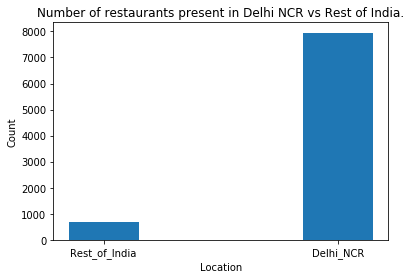

In [65]:
#1.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
location=df.City

boolarr=((location=="New Delhi") | (location=="Ghaziabad") | (location=="Noida") | (location=="Gurgaon") | (location=="Faridabad"))
location.loc[boolarr]="Delhi NCR"

total_res = len(location)
no_of_res_delhi = (location=='Delhi NCR').sum()
no_of_res_RestOfIndia = total_res - no_of_res_delhi

Location = ['Rest_of_India', 'Delhi_NCR']
Count = [no_of_res_RestOfIndia, no_of_res_delhi]

for i in range(2):
    print(Location[i]+":", Count[i])
    
# Graph plot (Bar-Graph)
plt.bar(Location, Count, width=0.3)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of restaurants present in Delhi NCR vs Rest of India.")
plt.show()


## Part 1.2: 
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). Here "location" variable holds all rows of "City" column. Then boolean array is used to convert "New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad" to "Delhi NCR".

"Cuisine" variable holds all rows of "Cuisines" column then all the rows are splited over "," in order to get each cuisine name (line 16).

Set "s1" holds the cuisine name present in Delhi NCR and Set "s2" holds the cuisine name present in Rest of India. In line 24 & 28 strip function is used to remove leading and trailing spaces from the name of each cuisine.

Taking the set difference of s1 and s2 we get the cuisine name which are present in Pest of India but not in Delhi NCR and this is stored in a variable "Cuisine_Only_RestofIndia".

From line 36 verification from Zomato API part starts. Where city_id = 1 of Delhi NCR is used. And Conclusion is printed as output

### Conclusion:
According to Dataset there are 4 cuisines which are present in Rest of India but not in Delhi NCR:
German, Cajun, BBQ and Malwani

But when we fetch cuisines of Delhi NCR from Zomato API we found that BBQ is served in Delhi NCR, so we can conclude that dataset is incomplete.

In [68]:
#1.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as r
import json
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.reset_index(drop=True,inplace=True)

location=df.City
boolarr=((location=="New Delhi") | (location=="Ghaziabad") | (location=="Noida") | (location=="Gurgaon") | (location=="Faridabad"))
location.loc[boolarr]="Delhi NCR"

Cuisine=df.Cuisines
Cuisine=pd.Series(Cuisine.str.split(","))   # split cuisine's name over ","

s1=set()
s2=set()

for i in range(len(location)):
    if location[i] == 'Delhi NCR':
        for j in range(len(Cuisine[i])):
            x = Cuisine[i][j].strip()
            s1.add(x)
    else:
        for j in range(len(Cuisine[i])):
            x = Cuisine[i][j].strip()
            s2.add(x)
        
Cuisine_Only_RestofIndia = s2-s1
print("Cuisines which are present in Rest of India but not in Delhi NCR:")
for x in Cuisine_Only_RestofIndia:
    print(x)

# Verification Part:
res = r.get("https://developers.zomato.com/api/v2.1/cuisines", params={'city_id':1}, headers= {'user-key': '3e75e173fb9e09b2e40e49575b2af392','Accept': 'application/json'})
py_data = res.json()
print()
for x in py_data["cuisines"]:
    if x["cuisine"]["cuisine_name"] in Cuisine_Only_RestofIndia:
        s = x["cuisine"]["cuisine_name"]
        print("Incomplete Dataset")
        break;
print(s+" cuisine is present in Delhi NCR but not given in dataset")

Cuisines which are present in Rest of India but not in Delhi NCR:
Malwani
BBQ
German
Cajun

Incomplete Dataset
BBQ cuisine is present in Delhi NCR but not given in dataset


## Part 1.3: 
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). Here "location" variable holds all rows of "City" column. Then boolean array is used to convert "New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad" to "Delhi NCR".

"Cuisine" variable holds all rows of "Cuisines" column then all the rows are splitted over "," in order to get each cuisine name (line 14).

List "delhi_cuisine" holds the cuisine name present in Delhi NCR and list "restIndia_cuisine" holds the cuisine name present in Rest of India. In line 21 strip function is used to remove leading and trailing spaces from the name of each cuisine.

Both these list are converted to pandas series and value_counts function is used for counting the frequency of each cuisine and top 10 cuisines are stored in "delhi_top10" & "restIndia_top10" variable (line: 27,28).
Then simply all top 10 cuisines are printed.

### Conclusion:
Top 10 cuisines served by maximum number of restaurants in Delhi NCR:
North Indian, Chinese, Fast Food, Mughlai, Bakery, South Indian, Continental, Desserts, Street Food, Italian.
Top 10 cuisines served by maximum number of restaurants in Rest of India:
North Indian, Chinese, Continental, Italian, Cafe, Fast Food, South Indian, Mughlai, Desserts, Mexican.


In [69]:
#1.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.reset_index(drop=True,inplace=True)

location=df.City
boolarr=((location=="New Delhi") | (location=="Ghaziabad") | (location=="Noida") | (location=="Gurgaon") | (location=="Faridabad"))
location.loc[boolarr]="Delhi NCR"

Cuisine=df.Cuisines
Cuisine=pd.Series(Cuisine.str.split(","))

delhi_cuisine = []
restIndia_cuisine = []

for i in range(len(location)):
    for j in range(len(Cuisine[i])):
            x = Cuisine[i][j].strip()
            if location[i] == 'Delhi NCR':
                delhi_cuisine.append(x)
            else:
                restIndia_cuisine.append(x)

delhi_top10 = pd.Series(delhi_cuisine).value_counts()[:10]
restIndia_top10 = pd.Series(restIndia_cuisine).value_counts()[:10]

print("Top 10 cuisines served by maximum number of restaurants in Delhi NCR")
print()
for val, cnt in delhi_top10.iteritems():
    print(val,cnt)
print("-----------------------------")
print()

print("Top 10 cuisines served by maximum number of restaurants in Rest of India")
print()
for val, cnt in restIndia_top10.iteritems():
    print(val,cnt)


Top 10 cuisines served by maximum number of restaurants in Delhi NCR

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
-----------------------------

Top 10 cuisines served by maximum number of restaurants in Rest of India

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


## Part 1.4: 
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). Here "location" variable holds all rows of "City" column. Then boolean array is used to convert "New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad" to "Delhi NCR".

"Cuisine" variable holds all rows of "Cuisines" column then all the rows are splitted over "," in order to get each cuisine name (line 14).

Set "s1" holds the cuisine name present in Delhi NCR and Set "s2" holds the cuisine name present in Rest of India. In line 24 & 28 strip function is used to remove leading and trailing spaces from the name of each cuisine.

Taking length of s1 and s2 we get the no of different cuisine served in Delhi and number of different cuisine served in India.

Taking the set difference of s1 and s2 we get the cuisine name which are present in Rest of India but not in Delhi NCR and the set difference of s2 and s1 we get the cuisine name which are present in Delhi NCR but not in Rest of India.

### Conclusion:

1. Based on perivous output we can conclude that North Indian & chinese cuisine are server in maximum no of restaurants in Delhi NCR and Rest of India both. But Mexican & cafe are more popular in Rest of India. And Bakery & street food is more popular cuisine in Delhi NCR as compared to rest of India.

2. Based on output of code written below we find out that there are total of 86 different cuisine served in Delhi NCR while only 70 different cuisines served in rest of India.

3. There are 4 different cuisine that are server in Rest of India but not in Delhi NCR like: Malwani, BBQ, Cajun, German 
and There are 20 different cuisine that are server in Delhi NCR but not in Rest of India like: Belgian, Assamese, Iranian, Deli, Kashmiri, Nepalese, Afghani, Moroccan, Turkish, Raw Meats, Persian, Naga, Pakistani, Oriya, Bihari, Drinks Only, South American, Cuisine Varies, Sri Lankan, Sushi.

Note: All these conclusion are based on zomato dataset. They may differ in actual as we have already found this in part 2 of this question 

In [70]:
#1.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.reset_index(drop=True,inplace=True)

location=df.City
boolarr=((location=="New Delhi") | (location=="Ghaziabad") | (location=="Noida") | (location=="Gurgaon") | (location=="Faridabad"))
location.loc[boolarr]="Delhi NCR"

Cuisine=df.Cuisines
Cuisine=pd.Series(Cuisine.str.split(","))

s1=set()
s2=set()

for i in range(len(location)):
    for j in range(len(Cuisine[i])):
            x = Cuisine[i][j].strip()
            if location[i] == 'Delhi NCR':
                s1.add(x)
            else:
                s2.add(x)
                
print("Total Different cuisine serverd in Delhi: ",len(s1))
print("Total Different cuisine serverd in Rest of India: ",len(s2))
print()
print("================================================================================")


Cuisine_Only_RestofIndia = s2-s1  
print("Cuisine serverd in Rest of India but not in Delhi: ")
#print()  
for x in Cuisine_Only_RestofIndia:
    print(x+",", end=" ")
#print("-----------------------------")
print()

Cuisine_Only_Delhi = s1-s2 
print()
print("Cuisine serverd in Delhi but not in Rest of India: ")
#print()  
for x in Cuisine_Only_Delhi:
    print(x+",", end=" ")


Total Different cuisine serverd in Delhi:  86
Total Different cuisine serverd in Rest of India:  70

Cuisine serverd in Rest of India but not in Delhi: 
Malwani, BBQ, German, Cajun, 

Cuisine serverd in Delhi but not in Rest of India: 
Bihari, Naga, Drinks Only, Deli, Belgian, Turkish, Raw Meats, Sri Lankan, Iranian, Nepalese, Cuisine Varies, Sushi, South American, Afghani, Oriya, Kashmiri, Assamese, Pakistani, Persian, Moroccan, 

# Question 2: 
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
## Part 2.1.1: 
Number of Votes given Restaurant

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). And dataset is sorted on the basis of Aggregate rating (line 8).

A list of all votes and aggregate rating has been made. A dictionary "d" is used to store the rating as key and all votes for that rating is store in list as value of this dictionary. Then mean to all votes associated with particular rating has been calculated.

Graph has been plotted where x-axis is rating and y-axis is Avg votes of a particular rating.

### Conclusion:
By looking to the graph we can conclude that initially on increase in no of votes rating increases and then in middle decrease in no of avg vote rating still increase. Then again rating increase gradually while increase in avg no votes. And finally no of avg votes fall but rating increases.

Overall we can conclude that rating increases while increase in no of avg votes at most of the time. Because for less votes rating is less and for more votes rating is more.

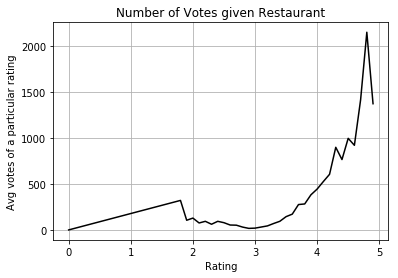

In [71]:
#2.1.1
from statistics import mean 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.sort_values("Aggregate rating", axis = 0, inplace = True) 
vote = list(df.Votes)
rating = list(df["Aggregate rating"])
d = {}
for i in range(len(vote)):
    d.setdefault(rating[i], list()).append(vote[i])
for x in d:
    d[x]=mean(d[x])
#print(d)
rate = list(d.keys())
avgvote = list(d.values())
plt.plot(rate,avgvote,color="black")
plt.grid()
plt.ylabel("Avg votes of a particular rating")
plt.xlabel("Rating")
plt.title("Number of Votes given Restaurant")
plt.show()

## Part 2.1.2: 
Restaurant serving more number of cuisines.

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 7) and NA values has been dropped from Cuisines column and index has been reset (line 8,9).

"list_of_no_of_cuisine" variable hold the number of cuisine serverd by a restaurant. And a column has been added for number of cuisine in dataframe "df".

A dictionary "d" is maintained to map number of cuisine with all aggregate rating from all restaurant. Here key is number of cuisine and value is rating as list line(22). Then Mean and max value of all list present in this dict has been calculated and store in dict d1 (line 26).

Then two graphs has been plotted first one is simple line graph and other one is bubble chart where size of bubble is maximum rating for that particular number of cuisine. X-axis: No of Cuisine, Y-axis : Avg Rating.

### Conclusion:
From these two chats we can conclude two points:
1. On increase in no of cuisine average rating increases but when no of cuisine reaches maximum avg rating falls a little. Means If no of cuisine is less then avg rating will also be less and vice-versa. This is logarithmic increase.

2. By seeing the size of bubble of the graph we can conclude that on increase in no of cuisine maximum rating decrease. That means if cuisine is less then maximum rating will be more and vice-versa.

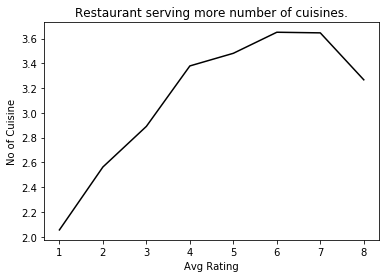

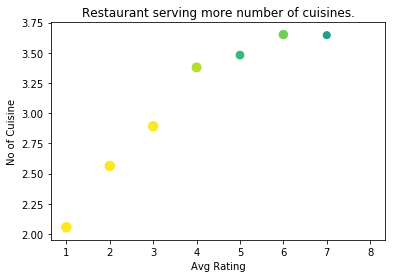

OrderedDict([(1, [[2.05508556667743, 4.9]]),
             (2, [[2.5634223918575065, 4.9]]),
             (3, [[2.8905388471177944, 4.9]]),
             (4, [[3.3791666666666664, 4.8]]),
             (5, [[3.4812903225806453, 4.6]]),
             (6, [[3.6514285714285712, 4.7]]),
             (7, [[3.646153846153846, 4.5]]),
             (8, [[3.2666666666666666, 4.0]])])

In [2]:
from collections import OrderedDict 
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.dropna(subset=['Cuisines'], inplace= True)
df.reset_index(drop=True,inplace=True)

cuisine = df.Cuisines
list_of_no_of_cuisine = []
rating = list(df["Aggregate rating"])

for x in cuisine:
    list_of_no_of_cuisine.append(len(x.split(",")))
df["No of cuisine"] = list_of_no_of_cuisine
no_of_cuisine = df["No of cuisine"]

d = {}
for i in range(len(no_of_cuisine)):
    d.setdefault(no_of_cuisine[i], list()).append(rating[i])

d1={}
for x in d:
    d1.setdefault(x, list()).append([mean(d[x]), max(d[x])])
    #d1[x]=l.append([mean(d[x]), max(d[x]), min(d[x]), mode(d[x])])

d1 = OrderedDict(sorted(d1.items())) 
list_cuisine_count = list(d1.keys())

avg_rating = []
max_rating = []
for x in d1.values():
    avg_rating.append(round(x[0][0], 3))
    max_rating.append(x[0][1])
plt.plot(list_cuisine_count,avg_rating,color="black")
plt.ylabel("No of Cuisine")
plt.xlabel("Avg Rating")
plt.title("Restaurant serving more number of cuisines.")
plt.show()
max_rating = [(i-4) * 100 for i in max_rating]
plt.scatter(list_cuisine_count,avg_rating,s=max_rating,c=max_rating)#every point will have different color
plt.ylabel("No of Cuisine")
plt.xlabel("Avg Rating")
plt.title("Restaurant serving more number of cuisines.")
plt.show()
d1

## Part 2.1.3: 
Average Cost of Restaurant.

### Explanation:
After loading Dataset Dropped all the rows where country is not India (line 6). Then dataframe has been sorted and index has been reset. Two list has been created where "Average Cost for two" & "Aggregate rating" has been stored.

A dictionary "d" is maintained to map Avg cost of two with aggregate rating from all restaurant with that particular avg cost. Here key is Avg cost and value is rating as list line(16). Then Mean value of all list present in this dict has been calculated and store in dict d (line 18).

Graph has been plotted where x-axis is no of votes and y-axis is avg rating.

Another graph has been plotted where x-axis is rating and y-axis is avg vote associated with that rating.


### Conclusion:
In first plot We are getting a logarithmic graph. That means on increase in no of votes avg rating also increases.
From second graph also we can conclude the same that onincrease in no of votes avg rating also increases and more the votes higher the rating.

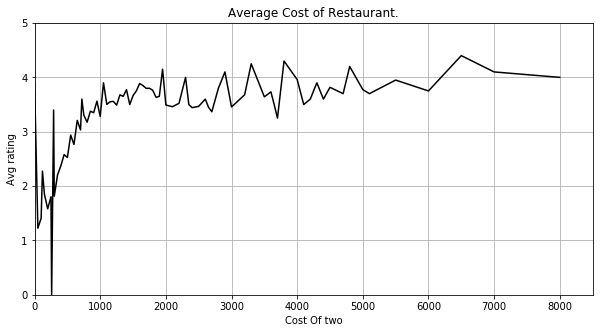

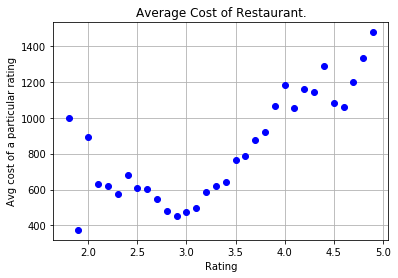

In [73]:
from statistics import mean 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.sort_values("Average Cost for two", axis = 0, inplace = True) 
df.reset_index(drop=True,inplace=True)
avg_cost = list(df["Average Cost for two"])
rating = list(df["Aggregate rating"])

# part-1
d = {}
for i in range(len(avg_cost)):
    d.setdefault(avg_cost[i], list()).append(rating[i])
for x in d:
    d[x]=mean(d[x])
    
rate = list(d.keys())
avgvote = list(d.values())

plt.plot(rate,avgvote,color="black")
plt.grid()
plt.ylabel("Avg rating")
plt.xlabel("Cost Of two")
plt.gcf().set_size_inches((10,5))
plt.axis([0,8500,0,5])
plt.title("Average Cost of Restaurant.")
plt.show()

df.drop(df[(df['Aggregate rating'] == 0)].index, inplace = True)
df.sort_values("Average Cost for two", axis = 0, inplace = True) 
df.reset_index(drop=True,inplace=True)
avg_cost = list(df["Average Cost for two"])
rating = list(df["Aggregate rating"])
d = {}
for i in range(len(avg_cost)):
    d.setdefault(rating[i], list()).append(avg_cost[i])
for x in d:
    d[x]=mean(d[x])
#print(d)
rate = list(d.keys())
avgcost = list(d.values())
#print(rate,avgvote)
plt.plot(rate,avgcost,"bo")
plt.grid()
plt.ylabel("Avg cost of a particular rating")
plt.xlabel("Rating")
plt.title("Average Cost of Restaurant.")
plt.show()


## Part 2.1.4: 
Restaurant serving some specific cuisines.

### Explanation:
After loading Dataset Dropped all the NA values of cuisine column has been dropped and index has been reset. All ratings of 
"Aggregate rating" column has been taken down as a list (line 10) and in cuisines split function over comma (",") has been use to take down all cuisine present in a row (line 12).

A dictionary has been maintained where all cuisines as mapped with their respective rating in the form of list (line 16). And then mean of each list has been taken to get the avg value of rating for each cuisine (line 19). 

Then 10 most served cuisine and 10 least served cuisine has been taken in a list (line 20,21). An finally 2 Graphs are plotted where x-axis is Cuisine name and Y-axis is avg rating of those restaurant where that cuisine is been served.

First graph is about top 10 most served cuisine and second graph is about top 10 least served cuisine

### Conclusion:
after analyzing both the graph we can conclude that avg rating of those restaurants which are serving popular cuisine are lower that as compared to avg rating of those restaurants which are serving least 10 served cuisine.

Italian serving restaurants and bakery serving restaurants are having highest and loswest avg rating respectively among top 10 most served cuisine.
And Bi_rek serving restaurants and mineira serving restaurants are having highest and loswest avg rating respectively among top 10 least served cuisine.

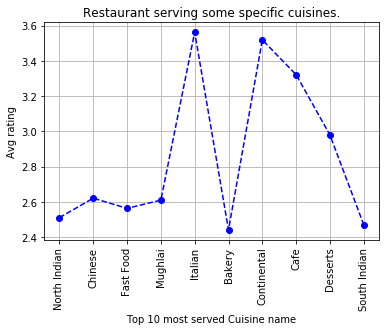

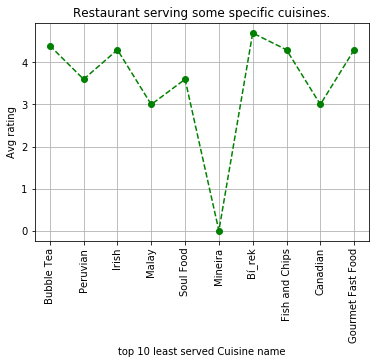

In [74]:
# I am considering top 10 most and top 10 least serverd cuisine as specific cuisine .
from statistics import mean 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.dropna(subset=['Cuisines'], inplace= True)
df.reset_index(drop=True,inplace=True)
d={}
rating = list(df["Aggregate rating"])
all_cuisine = []
cuisine = df.Cuisines.str.split(",")
for i in range(len(cuisine)):
    for y in cuisine[i]:
        all_cuisine.append(y.strip())
        d.setdefault(y.strip(), list()).append(rating[i])
#print(d)
for x in d:
    d[x]=mean(d[x])        
top10most_cuisines = pd.Series(all_cuisine).value_counts()[:10].keys().tolist()
top10least_cuisines = pd.Series(all_cuisine).value_counts()[-10:].keys().tolist()
most10 = {}
least10 = {}
for x in top10most_cuisines:
    most10[x] = d[x]
for x in top10least_cuisines:
    least10[x] = d[x]
most10_name = list(most10.keys())
most10_rating = list(most10.values())
least10_name = list(least10.keys())
least10_rating = list(least10.values())

plt.plot(most10_name,most10_rating,"bo--")
plt.grid()
plt.ylabel("Avg rating")
plt.xlabel("Top 10 most served Cuisine name")
plt.xticks(rotation=90)
plt.title("Restaurant serving some specific cuisines.")
plt.show()

plt.plot(least10_name,least10_rating,"go--")
plt.grid()
plt.ylabel("Avg rating")
plt.xlabel("top 10 least served Cuisine name")
plt.xticks(rotation=90)
plt.title("Restaurant serving some specific cuisines.")
plt.show()

## Part 2.2.1: 
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

### Explanation:

After loading Dataset Dropped all the rows where country is not India (line 6). A  new column named "vote_rating" is made which hold the product of vote and Aggregate rating. A variable "arr" holds unique Localities.

A dictionary d is used to map Locality name with their weighted rating which has been calculated using boolean arr and sum function.

This dictionary has been sorted on the basis of values (line 20).

Top 10 result of most weighted Locality has been printed and a bar graph has been plotted for same.

### Conclusion:
Hotel Clarks Amer, Malviya Nagar is the most weighted locality with weight as 4.9

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


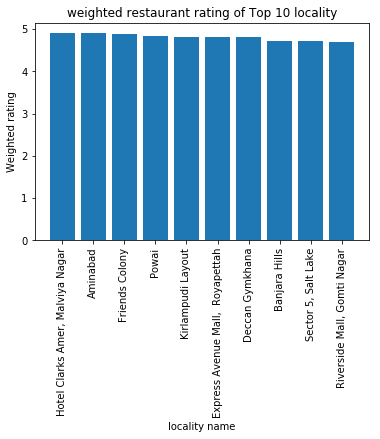

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
locality = df.Locality
df["vote_rating"] = df["Votes"] * df["Aggregate rating"]
arr = df["Locality"].unique()
d={}
#city_count=[]
for x in arr:
    boolarr=(locality==x)
    vote_sum = df.Votes[boolarr].sum()
    vote_rating_sum = df.vote_rating[boolarr].sum()
    if vote_sum != 0: 
        weight = round((vote_rating_sum)/vote_sum, 2)
        d[x] = weight
    
d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]))
locality_name = []
locality_weight = []
for i in range(-1,-11,-1):
    print(d[i][0], d[i][1])
    locality_name.append(d[i][0])
    locality_weight.append(d[i][1])
    

plt.bar(locality_name,locality_weight)
plt.ylabel("Weighted rating")
plt.xlabel("locality name")
plt.xticks(rotation=90)
plt.title("weighted restaurant rating of Top 10 locality")
plt.show()  

# Question 3: 
Visualization

## Part 3.1: 
Plot the bar graph top 15 restaurants have a maximum number of outlets.

### Explanation:
Variable "res_name" is used to store all values of "Restaurant Name" column. 

value_counts function is used for calculating the frequency of each restaurant and top 15 values has been stored in a list and graph has been plotted.

### Conclusion:
Cafe coffee day is having most number of outlets (83) in the dataset.

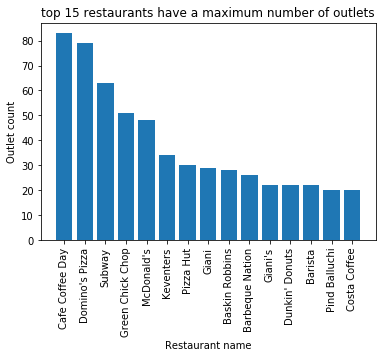

In [76]:
# 3.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
res_name = df['Restaurant Name']

top_15 = res_name.value_counts()[:15]
name = []
count_name = []
for val, cnt in top_15.iteritems():
    name.append(val)
    count_name.append(cnt)

plt.bar(name,count_name)
plt.ylabel("Outlet count")
plt.xlabel("Restaurant name")
plt.xticks(rotation=90)
plt.title("top 15 restaurants have a maximum number of outlets")
plt.show()


## Part 3.2: 
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

### Explanation:
After loading dataset unrated restaurants have been dropped and index have been reset.

A variable "rating" stores a list of all values of "Aggregate rating" column and histogram is been plotted based on this rating


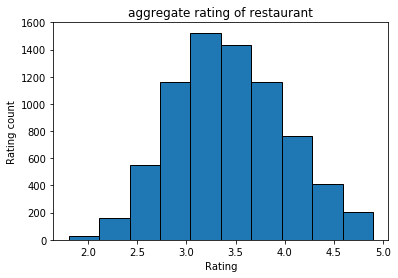

In [77]:
# 3.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Aggregate rating'] == 0)].index, inplace = True)
df.reset_index(drop=True,inplace=True)
rating = df['Aggregate rating'].tolist()
plt.hist(rating,edgecolor="black")
plt.ylabel("Rating count")
plt.xlabel("Rating")
plt.title("aggregate rating of restaurant")
plt.show()

## Part 3.3:
Plot the bar graph top 10 restaurants in the data with the highest number of votes.

### Explanation:
A variable "res_name" used to store all values of "Restaurant Name" column and nlargest function is used to get the first 10 rows of Votes column ordered in descending form and this is stored in "top10_votes" variable which is then converted to python list.

Then bar graph has been plotted where x-axis is top 10 restaurant name and y-axis is no of votes.

### Conclusion:
Toit is the most votes restaurant with 10934 votes in the dataset.

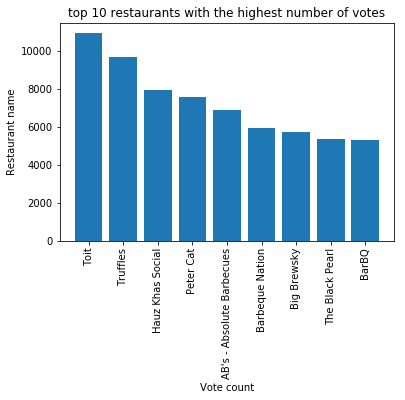

In [78]:
# 3.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
res_name = df['Restaurant Name']
top10_votes = df.nlargest(10, ['Votes'])
votes = top10_votes['Votes'].tolist()
res_name = top10_votes['Restaurant Name'].tolist()
plt.bar(res_name,votes)
plt.xticks(rotation=90)
plt.ylabel("Restaurant name")
plt.xlabel("Vote count")
plt.title("top 10 restaurants with the highest number of votes")
plt.show()

## Part 3.4: 
Average Cost of Restaurant.

### Explanation:
After loading Dataset Dropped all the rows where country is not USA (line 7). Then index has been reset and also NA values of cuisine column has been dropped and each cuisine has been splitted over "," using str.split function (line 11).

list l is used to store each cuisine which is then converted into pandas series and frequency of each cuisine has been calculated using value_counts function. And top 10 cuisine has been stored in variable "top_10_cuisine".

Pie chat has been plotted with percentage value till 2 decimal place.


### Conclusion:
We can conclude that american cuisine is most popular cuisine in USA with 22.18 percent among top 10 cuisine. 

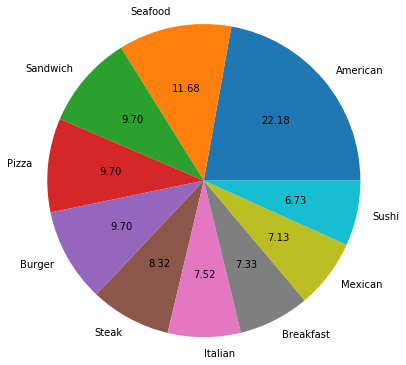

In [79]:
# 3.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 216)].index, inplace = True)
df.reset_index(drop=True,inplace=True)
Cuisine=df.Cuisines
Cuisine=Cuisine.dropna()
Cuisine=pd.Series(Cuisine.str.split(","))
l=[]
for x in Cuisine:
    for y in x:
        l.append(y.strip())
top_10_cuisine = pd.Series(l).value_counts()[:10]
cuisine_name = []
cuisine_count = []
for val,cnt in top_10_cuisine.iteritems():
    cuisine_name.append(val)
    cuisine_count.append(cnt)
plt.pie(cuisine_count, labels=cuisine_name, autopct="%.2f", radius=1.8)
plt.show()
    
    

## Part 3.5: 
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

### Explanation:

After loading Dataset Dropped all the rows where country is not India (line 7). Then index has been reset. A  new column named "vote_rating" is made which hold the product of vote and Aggregate rating. A variable "arr" holds unique cities.

A dictionary d is used to map City name with their weighted rating which has been calculated using boolean arr and sum function.

a list "city_count" is maintained to calculate the frequency of city which is further used as y-axis.

A bubble chat has been plotted x-axis: City name, y-axis: Frequency of city and size of bubble is weighted rating. And color of bubble is also depending on weighted rating.

### Conclusion:
Seeing the size of bubble it is clear that "Secunderabad" having maximum weighted rating and "Ghaziabad" is minimun weighted rating. 

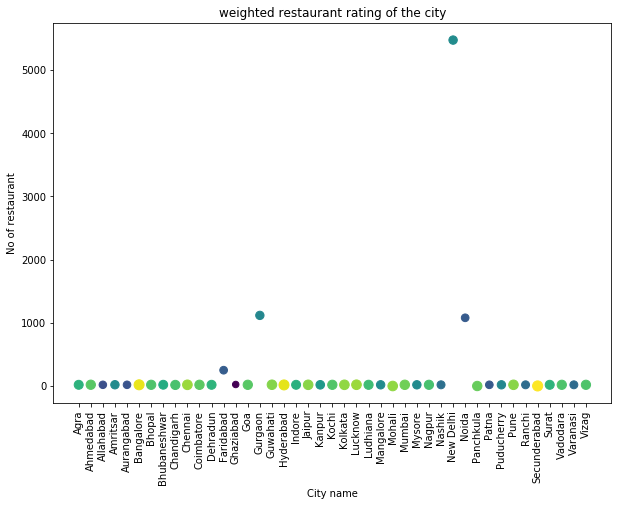

In [80]:
#3.5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df= pd.read_csv("zomato.csv", engine='python')
df.drop(df[(df['Country Code'] != 1)].index, inplace = True)
df.reset_index(drop=True,inplace=True)
city = df.City
df["vote_rating"] = df.Votes * df["Aggregate rating"]
arr = df["City"].unique()
d={}
city_count=[]
for x in arr:
    boolarr=(city==x)
    vote_sum = df.Votes[boolarr].sum()
    vote_rating_sum = df.vote_rating[boolarr].sum()
    weight = round(vote_rating_sum/vote_sum, 2)
    d[x] = weight
    city_count.append(boolarr.sum())
    
city_name = list(d.keys())
city_weight = list(d.values())
city_weight = [(i-2) * 40 for i in city_weight]
plt.scatter(city_name,city_count,s=city_weight, c= city_weight)
plt.gcf().set_size_inches((10,7))
plt.xticks(rotation=90)
plt.ylabel("No of restaurant")
plt.xlabel("City name")
plt.title("weighted restaurant rating of the city")
plt.show()
